In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler, normalize
import matplotlib.colors
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [226]:
pd.options.mode.chained_assignment = None

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
FOLDER_PATH = "/content/drive/MyDrive/eq.csv"

In [229]:
missing_values = ["N/a","na","nan","NaN",'#VALUE!',' ','nan',np.nan]

In [230]:
df = pd.read_csv(FOLDER_PATH,encoding='unicode_escape',low_memory=False,na_values = missing_values)
df

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,International Institute of Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gachibowli, Hyderabad - 500 032 India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INDIAN EARTHQUAKES CATALOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERIOD : 2474 BC - 2015 AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52994,52970,2019,7,28,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.074275362,2.323765786,2.915005247,32.8°N,78.4°E,10,NaN,NaN,NaN,Jammu & Kashmir,NaN
52995,52971,2019,7,28,10:44:10,16:14:10,3.6,3.6,NaN,3.436594203,2.783008037,3.334732424,25.5°N,90.4°E,70,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52996,52972,2019,7,28,21:25:06,7/29/2019 2:55,4,4,NaN,3.798913043,3.242250287,3.754459601,23.2°N,86.5°E,22,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52997,52973,2019,7,29,3:33:53,9:03:53,4.3,4.3,NaN,4.070652174,3.586681975,4.069254984,32.8°N,76.4°E,20,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


In [231]:
df = df.iloc[10:]

In [232]:
headers_ =['SI. No.','YEAR','MONTH','DATE','ORIGIN TIME(UTC)','IST','MAGNITUDE(Mw)','MAGNITUDE(MW)','MAGNITUDE(Mb1)','MAGNITUDE(Mb)',
           'MAGNITUDE(Ms)','MAGNITUDE(ML)','LAT','LONG','DEPTH(km)','INTENSITY(MM)','INTENSITY(MMI)','INTENSITY(MME)','LOCATION',
           'REFERENCE']

In [233]:
df.columns = headers_
df.head(5)

,SI. No.,YEAR,MONTH,DATE,ORIGIN TIME(UTC),IST,MAGNITUDE(Mw),MAGNITUDE(MW),MAGNITUDE(Mb1),MAGNITUDE(Mb),MAGNITUDE(Ms),MAGNITUDE(ML),LAT,LONG,DEPTH(km),INTENSITY(MM),INTENSITY(MMI),INTENSITY(MME),LOCATION,REFERENCE
10,1,-2474,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
11,2,-325,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0,NaN,NaN,NaN,NaN,Dr STGR
12,3,25,0,0,NaN,NaN,7.5,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0,NaN,NaN,NaN,NaN,Dr STGR
13,4,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
14,5,26,5,10,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80,NaN,NaN,NaN,Myanmar,G-R


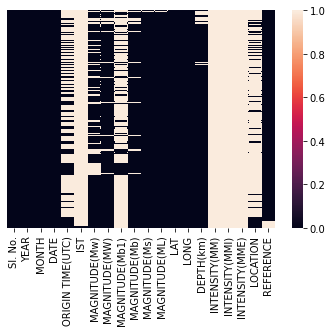

In [234]:
sns.heatmap(df.isnull(),yticklabels = False)

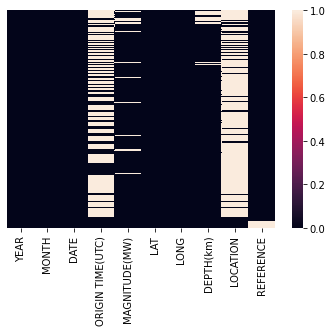

In [235]:
df.drop('IST', axis=1, inplace=True)
df.drop('INTENSITY(MM)', axis=1, inplace=True)
df.drop('INTENSITY(MMI)', axis=1, inplace=True)
df.drop('INTENSITY(MME)',axis=1, inplace=True)
df.drop('MAGNITUDE(Ms)', axis=1, inplace=True)
df.drop('MAGNITUDE(Mb)', axis=1, inplace=True)
df.drop('MAGNITUDE(ML)',axis=1, inplace=True)
df.drop('MAGNITUDE(Mw)', axis=1, inplace=True)
df.drop('MAGNITUDE(Mb1)', axis=1, inplace=True)
df.drop('SI. No.', axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels = False)


In [236]:
a = df['ORIGIN TIME(UTC)'].isnull().sum()
b ,c = ndf.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

60.02038235793685


In [237]:
df.drop('ORIGIN TIME(UTC)',axis=1, inplace=True)

In [238]:
a = df['LOCATION'].isnull().sum()
b ,c = ndf.shape

print("% of data have null value \n")
print((a/b)*100)

% of data have null value 

82.31264272368695


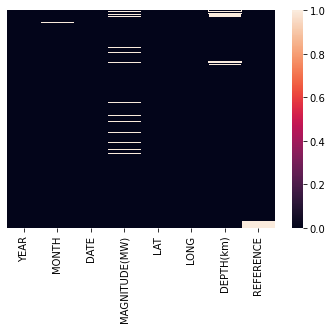

In [239]:
df.drop('LOCATION',axis=1, inplace=True)
sns.heatmap(df.isnull(),yticklabels = False)

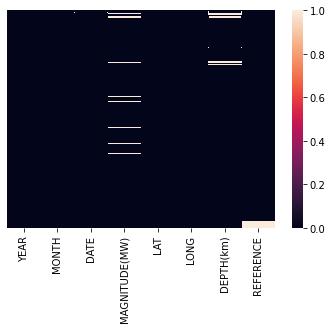

In [240]:
df.drop(df[df['YEAR'].astype(int) < 0].index, inplace = True)
df['DATE'].dropna()
df['MONTH'].dropna()
sns.heatmap(df.isnull(),yticklabels = False)

In [241]:
df['REFERENCE'].dropna()
# df.drop('REFERENCE',axis=1, inplace=True)
df["REFERENCE"] = df["REFERENCE"].astype("category")
df['REFERENCE'] = df['REFERENCE'].cat.codes
df.isnull().sum()

YEAR                0
MONTH              20
DATE               57
MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)        2178
REFERENCE           0
dtype: int64

In [242]:
date_col = df[df.columns[0:3]]
date_ = date_col.set_axis(['year', 'month', 'day'],axis = 'columns')
date_

,year,month,day
12,25,0,0
13,26,5,10
14,26,5,10
15,50,0,0
16,110,0,0
...,...,...,...
52994,2019,7,28
52995,2019,7,28
52996,2019,7,28
52997,2019,7,29


In [243]:
df['date'] = pd.to_datetime(date_, infer_datetime_format=True, errors = 'coerce')
df.head(5)

,YEAR,MONTH,DATE,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
12,25,0,0,7.5,72.9,33.72,0,8,NaT
13,26,5,10,6.1397,17.3,80.1,NaN,26,NaT
14,26,5,10,6.1397,26,97,80,9,NaT
15,50,0,0,7,69.5,37.1,0,8,NaT
16,110,0,0,6.5,76.47,18.1,0,8,NaT


In [244]:
df = df.drop(['YEAR', 'MONTH', 'DATE'] ,axis = 1)
df.head(5)

,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
12,7.5,72.9,33.72,0,8,NaT
13,6.1397,17.3,80.1,NaN,26,NaT
14,6.1397,26,97,80,9,NaT
15,7,69.5,37.1,0,8,NaT
16,6.5,76.47,18.1,0,8,NaT


In [245]:
df.isnull().sum()

MAGNITUDE(MW)    2507
LAT                 0
LONG                0
DEPTH(km)        2178
REFERENCE           0
date              116
dtype: int64

In [246]:
df = df[~df['date'].isin(['NaT'])]
df = df.reset_index(drop=True)
print(df.isnull().sum())
df.head(5)

MAGNITUDE(MW)    2459
LAT                 0
LONG                0
DEPTH(km)        2123
REFERENCE           0
date                0
dtype: int64


,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
0,6.5,99.900,026.50,000.00,8,1688-06-14
1,7.2,94.600,027.75,000.00,8,1697-02-13
2,7.0,72.150,021.75,000.00,8,1705-02-04
3,NaN,19.1,73.3,NaN,26,1720-07-15
4,6.5,77.100,028.37,000.00,8,1720-07-15


In [247]:
df['DEPTH(km)']=df['DEPTH(km)'].astype(float)
df['DEPTH(km)'] = df['DEPTH(km)'].fillna(df['DEPTH(km)'].mean())
df['DEPTH(km)'].isnull().sum()

0

In [248]:
df['MAGNITUDE(MW)']=df['MAGNITUDE(MW)'].astype(float)
df['MAGNITUDE(MW)'] = df['MAGNITUDE(MW)'].fillna(df['MAGNITUDE(MW)'].mean())
df['MAGNITUDE(MW)'].isnull().sum()

0

In [249]:
def to_float(value):
  try:
    return float(value)
  except:
    return np.nan

def correct_LATandLONG( X ) :
  if str(X)[-1] == '-' :
    X = -1 * to_float(str(X)[:-1])
    return X
  else :
    return to_float(str(X))

In [250]:
df['LAT'] = df['LAT'].replace({'-':'',',':'', ' ':'', 'N':'','°':'','\?':'','S':'-'}, regex=True)
df['LONG'] = df['LONG'].replace({'-':'',',':'' ,' ':'', 'E': '','°':'','\?':'','S':'','W':'-'}, regex=True)

In [251]:
df['LAT']=df['LAT'].apply(correct_LATandLONG)
df['LONG']=df['LONG'].apply(correct_LATandLONG)

In [252]:
df['LAT'] = df['LAT'].fillna(0)
df['LONG'] = df['LONG'].fillna(0)

In [253]:
df.select_dtypes(['object']).columns 

Index([], dtype='object')

In [254]:
df.isnull().sum()

MAGNITUDE(MW)    0
LAT              0
LONG             0
DEPTH(km)        0
REFERENCE        0
date             0
dtype: int64

In [255]:
type(df['date'])

pandas.core.series.Series

In [256]:
df['date'] = df['date'].values.astype(float)

In [257]:
df.head(5)

,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
0,6.500000,99.90,26.50,0.000000,8,-8.884771e+18
1,7.200000,94.60,27.75,0.000000,8,-8.611229e+18
2,7.000000,72.15,21.75,0.000000,8,-8.359632e+18
3,4.575922,19.10,73.30,45.615873,26,-7.872336e+18
4,6.500000,77.10,28.37,0.000000,8,-7.872336e+18


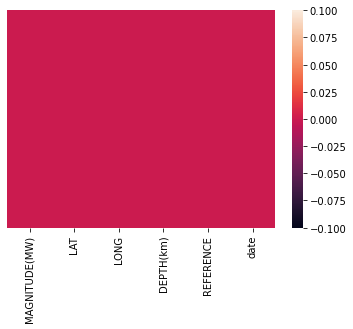

In [258]:
sns.heatmap(df.isnull(),yticklabels = False)

In [259]:
df.describe()

,MAGNITUDE(MW),LAT,LONG,DEPTH(km),REFERENCE,date
count,52871.000000,52871.000000,52871.000000,52871.000000,52871.000000,5.287100e+04
mean,4.575922,57.646332,52.016361,45.615873,13.731800,7.247728e+17
std,0.601263,31.300449,52.541171,54.405693,8.451205,7.196682e+17
min,1.682800,-62.000000,-179.700000,0.000000,-1.000000,-8.884771e+18
25%,4.200000,26.750000,27.300000,10.000000,8.000000,5.396544e+17
50%,4.500000,70.400000,37.360000,33.000000,8.000000,9.339840e+17
75%,4.841190,90.895000,91.105000,52.000000,21.000000,1.107043e+18
max,9.100000,100.000000,9128.200000,831.200000,37.000000,1.564531e+18


In [260]:
class_ = df['MAGNITUDE(MW)']
df.drop('MAGNITUDE(MW)', axis=1, inplace=True)

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [280]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X.shape

(52871, 5)

# Selection process for best threshold 

In [284]:
threshold = [4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0]
acc_scr = []
roc_scr = []
for th in threshold:
  label=[]
  for x in class_:
    if float(x) > th:
      label.append(1)
    else:
      label.append(0)
  label= np.array(label)

  X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

  ran_clf = RandomForestClassifier(n_estimators = 300,max_depth=16, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  acc_scr.append(accuracy_score(y_test, y_pred))
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))
  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  roc_scr.append(roc_auc_score(y_test,y_pred_))
  print("Area under curve : ",roc_auc_score(y_test,y_pred_))

RandomForestClassifier 0.8847026781661371
Area under curve :  0.7879621902097267
RandomForestClassifier 0.8251626569829021
Area under curve :  0.781000945298272
RandomForestClassifier 0.7694810107429263
Area under curve :  0.7793894539068501
RandomForestClassifier 0.7371009229838099
Area under curve :  0.7998704313668081
RandomForestClassifier 0.7374791950370707
Area under curve :  0.8102617747449854
RandomForestClassifier 0.7321833862914208
Area under curve :  0.8100262457547625
RandomForestClassifier 0.7455742169768498
Area under curve :  0.7981189020712309
RandomForestClassifier 0.7638825843546678
Area under curve :  0.7996766519870312
RandomForestClassifier 0.7952035103646543
Area under curve :  0.8021489507062254
RandomForestClassifier 0.8345438039037676
Area under curve :  0.8118062258000807
RandomForestClassifier 0.8705553033741867
Area under curve :  0.8157002156387801


Text(0, 0.5, 'score')

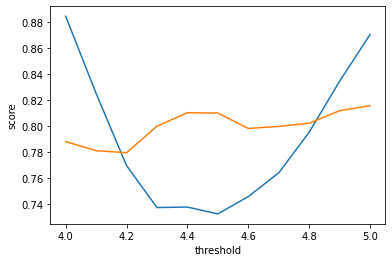

In [286]:
plt.plot(threshold,acc_scr)
plt.plot(threshold,roc_scr)
plt.xlabel('threshold')
plt.ylabel('score')

In [287]:
threshold = 4.0 ##[4,5]
label=[]
for x in class_:
  if float(x) > threshold:
    label.append(1)
  else:
    label.append(0)

label= np.array(label)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

# KNN

In [306]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [289]:
from sklearn.neighbors import KNeighborsClassifier

mean_acc = np.zeros(40)
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)
mean_acc

array([0.82334695, 0.77250719, 0.8602663 , 0.84498411, 0.86851263,
       0.86420033, 0.87343017, 0.87078227, 0.87774247, 0.87683462,
       0.87857467, 0.87827205, 0.87865033, 0.87948252, 0.8790286 ,
       0.87834771, 0.8790286 , 0.87759116, 0.87812074, 0.87751551,
       0.87857467, 0.87804509, 0.87849902, 0.87849902, 0.87887729,
       0.87887729, 0.8790286 , 0.87940687, 0.87880163, 0.8790286 ,
       0.87933122, 0.87925556, 0.87933122, 0.87970949, 0.88008776,
       0.88008776, 0.87993645, 0.88016341, 0.88016341, 0.8808443 ])

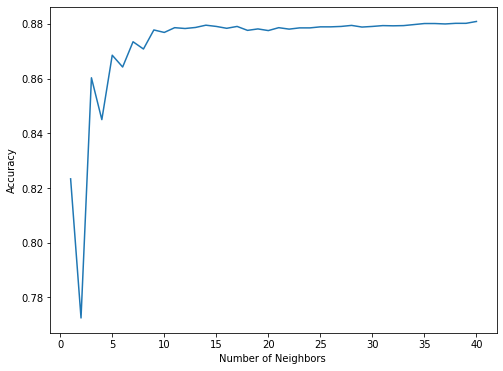

In [290]:
plt.figure(figsize = (8, 6))
plt.plot(range(1,41), mean_acc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

KNeighborsClassifier 0.8777424723861401


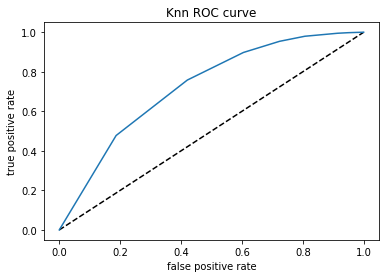

KNeighborsClassifier 0.8781207444394008


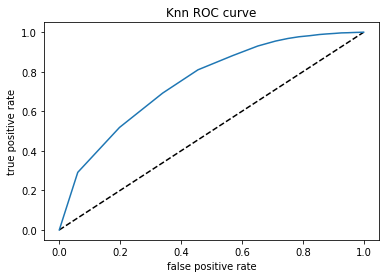

KNeighborsClassifier 0.8788772885459222


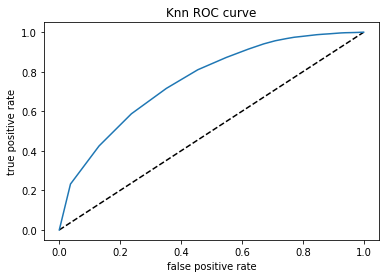

KNeighborsClassifier 0.879331215009835


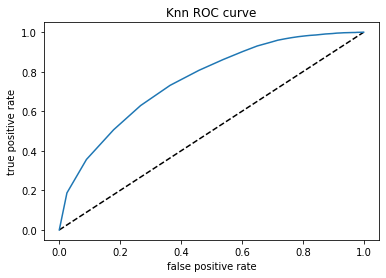

KNeighborsClassifier 0.8801634135270087


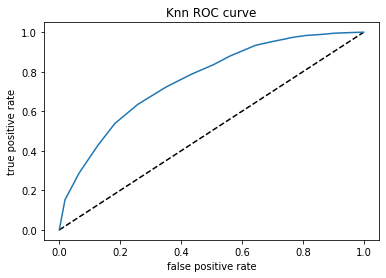

In [291]:
from sklearn.metrics import roc_curve
k = [9,19,25,31,39]
for i in k:
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  print(knn.__class__.__name__, accuracy_score(y_test, y_pred))
  y_pred_ = knn.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('Knn ROC curve')
  plt.show()

In [292]:
clf = KNeighborsClassifier()
parameters = {'n_neighbors':range(3,50)}
knn_clf = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(knn_clf.__class__.__name__, accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

GridSearchCV 0.8790285973672265
{'n_neighbors': 27}


KNeighborsClassifier 0.8790285973672265
Area under curve :  0.7562935087871623


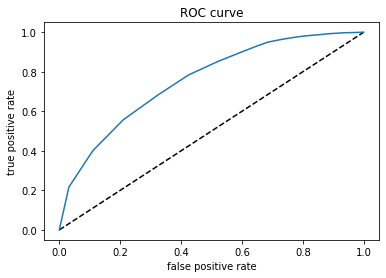

In [294]:
knn = KNeighborsClassifier(n_neighbors = 27).fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(knn.__class__.__name__, accuracy_score(y_test, y_pred))
y_pred_ = knn.predict_proba(X_test)[:,1]
print("Area under curve : ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

# DECISION TREE

In [307]:
dec_clf = DecisionTreeClassifier()
dec_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [295]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8195642305946437


In [296]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,40):
    clf=DecisionTreeClassifier(criterion='gini',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc_gini.append(accuracy_score(y_test,y_pred))
    
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,y_pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})

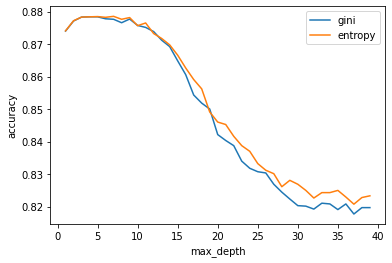

In [297]:
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [302]:
clf = DecisionTreeClassifier(criterion='entropy',random_state = 42)
tree2 = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

0.8783477076713573
{'max_depth': 3}


DecisionTreeClassifier 0.8783477076713573
Area under curve:  0.6808589635708873


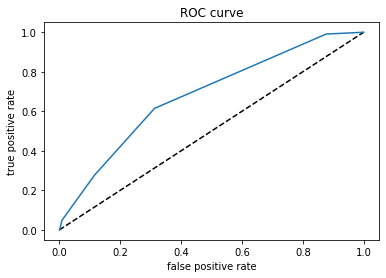

In [303]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [298]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': range(2,15)}

clf = DecisionTreeClassifier(criterion='gini',random_state = 42)
tree1 = GridSearchCV(clf, parameters,
                   cv = 10,
                   scoring = 'accuracy')
grid_search =tree1.fit(X_train, y_train)

In [300]:
y_pred = tree1.predict(X_test)
print(tree1.__class__.__name__,accuracy_score(y_test, y_pred))
print(grid_search.best_params_)

GridSearchCV 0.8784233620820093
{'max_depth': 5}


DecisionTreeClassifier 0.8784233620820093
Area under curve:  0.7293425309526554


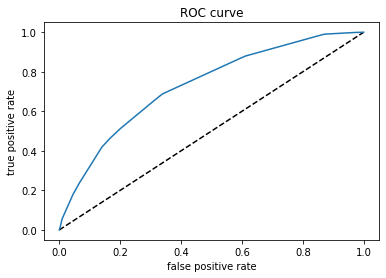

In [301]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [341]:
def decisionTree(leaf):
  clf = DecisionTreeClassifier(min_samples_leaf=leaf,random_state = 42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

DecisionTreeClassifier 0.8237252231805114
Area under curve:  0.6462330640816121


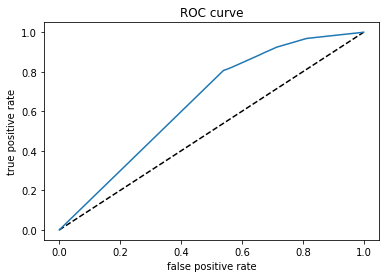

In [342]:
decisionTree(3)

DecisionTreeClassifier 0.8346194583144197
Area under curve:  0.6734255996189444


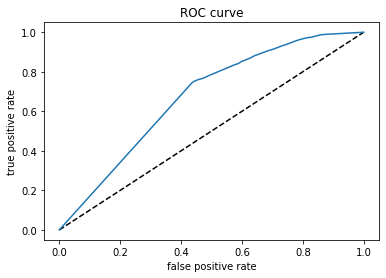

In [343]:
decisionTree(5)

DecisionTreeClassifier 0.8589801785444091
Area under curve:  0.7008093070565077


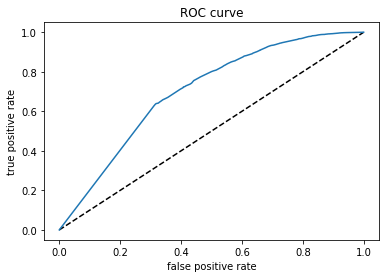

In [344]:
decisionTree(10)

In [348]:
def decisionTree(split):
  clf = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=split,random_state = 42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

DecisionTreeClassifier 0.8589801785444091
Area under curve:  0.7008093070565077


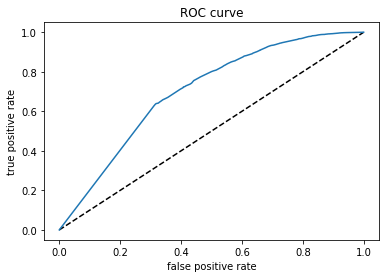

In [350]:
decisionTree(16)

DecisionTreeClassifier 0.8676047813587532
Area under curve:  0.7101539082139559


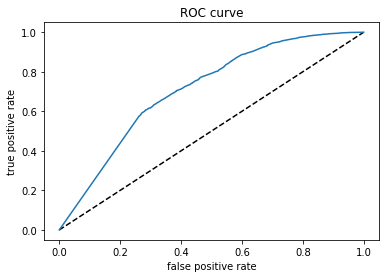

In [352]:
decisionTree(32)

DecisionTreeClassifier 0.8784233620820093
Area under curve:  0.7295419441140051


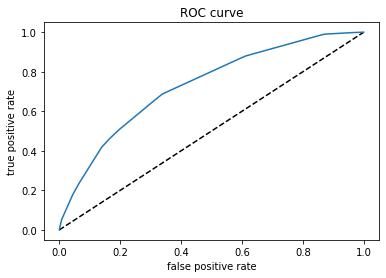

In [353]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=32,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

#Ensemble method

# RANDOM Forest

In [308]:
ran_clf = RandomForestClassifier()
ran_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [305]:
from sklearn.ensemble import RandomForestClassifier
ran_clf = RandomForestClassifier(n_estimators = 500,max_depth=16, random_state = 42)
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)
print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = ran_clf.predict_proba(X_test)[:,1]
print("Area under curve : ",roc_auc_score(y_test,y_pred_))

RandomForestClassifier 0.88409744288092
Area under curve :  0.7885651969463616


In [310]:
def randomForest(n_estm):
  ran_clf = RandomForestClassifier(n_estimators = n_estm,max_depth=16, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.8838704796489635
Area under curve:  0.7861548689674982


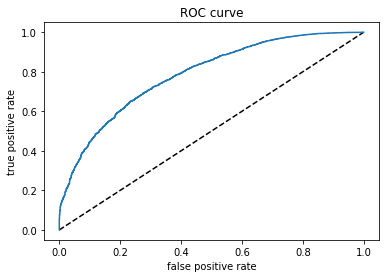

In [311]:
randomForest(100)

RandomForestClassifier 0.8843244061128763
Area under curve:  0.7878242695351868


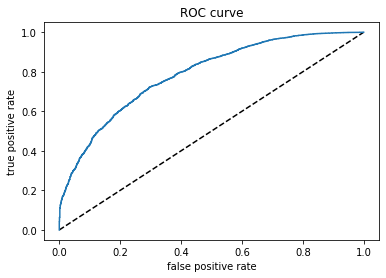

In [312]:
randomForest(200)

RandomForestClassifier 0.8842487517022243
Area under curve:  0.7886129709031247


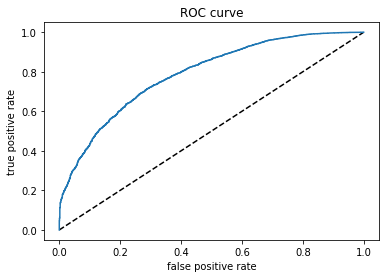

In [313]:
randomForest(400)

RandomForestClassifier 0.88409744288092
Area under curve:  0.7885651969463616


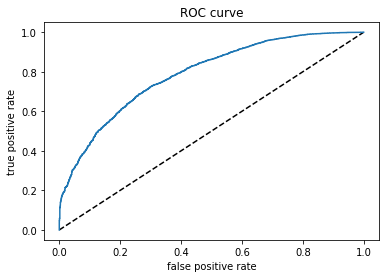

In [314]:
randomForest(500)

RandomForestClassifier 0.8844000605235285
Area under curve:  0.7886985785878546


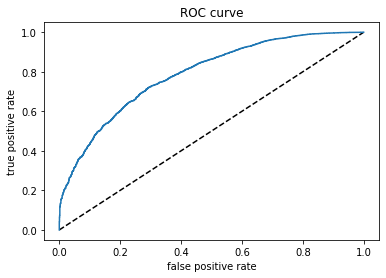

In [315]:
randomForest(1000)

In [316]:
def randomForest(depth):
  ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=depth, random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.8800877591163565
Area under curve:  0.774173013536563


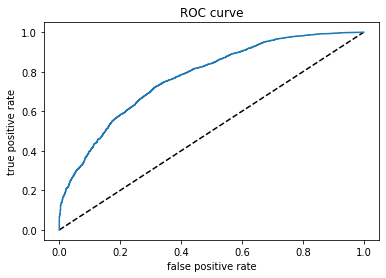

In [317]:
randomForest(8)

RandomForestClassifier 0.8786503253139658
Area under curve:  0.7331361989863401


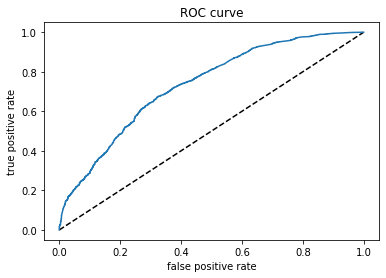

In [318]:
randomForest(4)

RandomForestClassifier 0.8804660311696172
Area under curve:  0.7696110571047887


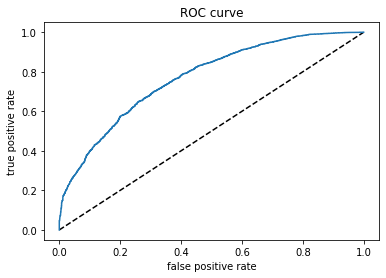

In [319]:
randomForest(30)

In [325]:
def randomForest(leaf_node):
  ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=16,min_samples_leaf=leaf_node ,random_state = 42)
  ran_clf.fit(X_train, y_train)
  y_pred = ran_clf.predict(X_test)
  print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

  y_pred_ = ran_clf.predict_proba(X_test)[:,1]
  print("Area under curve: ",roc_auc_score(y_test,y_pred_))
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='Knn')
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  plt.title('ROC curve')
  plt.show()

RandomForestClassifier 0.88409744288092
Area under curve:  0.7907129963825681


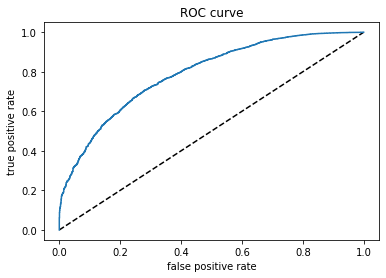

In [326]:
randomForest(2)

RandomForestClassifier 0.8844757149341806
Area under curve:  0.7916210565692334


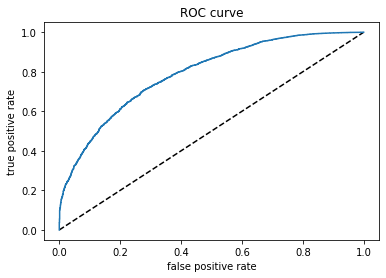

In [327]:
randomForest(3)

RandomForestClassifier 0.8842487517022243
Area under curve:  0.7930770718682599


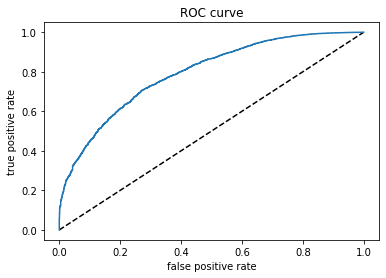

In [328]:
randomForest(4)

RandomForestClassifier 0.8838704796489635
Area under curve:  0.7934003828813843


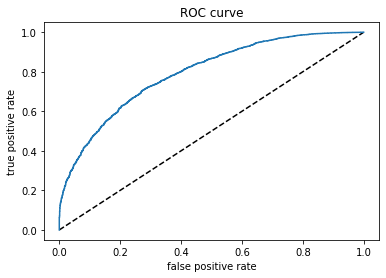

In [329]:
randomForest(5)

RandomForestClassifier 0.8844757149341806
Area under curve:  0.7916210565692334


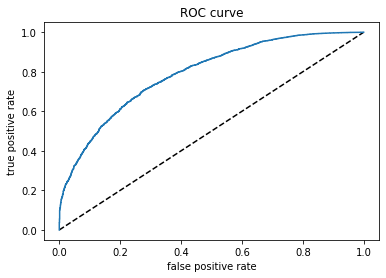

In [354]:
ran_clf = RandomForestClassifier(n_estimators = 1000 ,max_depth=16,min_samples_leaf=3,random_state = 42)
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)
print(ran_clf.__class__.__name__, accuracy_score(y_test, y_pred))

y_pred_ = ran_clf.predict_proba(X_test)[:,1]
print("Area under curve: ",roc_auc_score(y_test,y_pred_))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()